# Clustering

This notebook will be exploring the unsupervised learning method of clustering. 

## Unsupervised Learning

Unsupervised learning is used to draw inferences from data with unlabeled output values.

## K-means

K-means is a popular clustering algorithm. It is simple and powerful, and so, is perfect to demonstrate clustering in this notebook.

## MNIST Data set

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

We will drop the output variable, "label", since this is what we hope our K-means algorithm will figure out for itself.

This dataset is perfect to demonstrate K-means clustering, since we know what the output variable represents, but the K-means algorithm does not. So, this is a great way to test the algorithm's performance.

## Set-up

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv(r"C:\Users\kaiaj_000\Documents\mnist_train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
df = df.drop("label", 1)

In [5]:
df.shape

(42000, 784)

## K-means

Since we know that there are 10 digits, we choose 10 clusters. Hopefully, each of these clusters will accurately represent one of the digits.

In [6]:
kmeans = KMeans(10)
clusters = kmeans.fit(df)
kmeans.cluster_centers_.shape

(10, 784)

The output shows that we have 10 clusters, each with 784 dimensions.

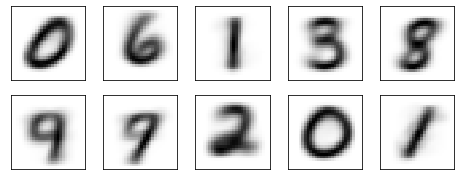

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We can see that the clusters represent most digits, other than 4, 5, and 7. This is probably due to the fact they look similar to other digits.

## Silhouette Analysis

It's all well and good knowing how many clusters to choose, as in the case we've just seen, but generally we won't know how many clusters to choose. This is because the sort of problem we use clustering for is where we don't know the relationship between the data, and so we don't know how many groups, or clusters, the data represents.

To fix our previous problem, we have something called silhouettes analysis. This is used to study the seperation distance between clusters, so that we can determine whther we have too few, or too many, clusters. The silhouette score given to each cluster is on the scale [-1, 1]. The closer the score to -1, the more likely that the samples have been assigned to the wrong cluster. The closer the score to 1, the more likely that the samples are in the correct cluster. The average score for each cluster is taken, and is then assgined to the score for that particular number of clusters.

Let's test the score of a range of cluster values from 1 to 15.

In [ ]:
for clusters in range(2,15):
    
    clusterer = KMeans(clusters)
    cluster_labels = clusterer.fit_predict(df)
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", clusters,
          "The average silhouette_score is :", silhouette_avg)

As can be seen, the only real outliers are when the algorithm has 2 and 8 clusters. This makes sense for 2 clusters, since the fewer number of clusters there are, the easier it should be to differentiate the samples, since there aren't many options to choose from. It is strange, however, that this is only the case for 2 clusters, and not, say, 3 or 4.

As for the 8 clusters, this also makes sense given our previous example, where we visualised the 10 clusters generated by the algorithm, since it didn't generate accurate representations of the digits 4, 5, or 7. However, it very nearly recognises the digit 4, hence bringing the total number of clusters up to 8.